# Case Study – Customer Churn
✔ A Telecom company is facing substantial churn, where a lot of its customers are cancelling the 
current service after using it for a certain period

✔ It’s important for the telecom company to retain its customers not only to maintain a good flow of 
revenues, but also to avoid incurring costs to acquire new customers (as a compensatory 
measure), which can often be multiple times of the cost of customer retention. Also, often any 
churned customer migrates to the competition in search of better alternatives, which every 
telecom client wants to minimize to the extent possible

✔ For reducing a future churn it’s important to understand what caused the customers to leave in 
the past and whether there are any relevant factors, which if tracked on-time can indicate taking 
appropriate actions to avoid a future churn.

✔ The Telecom company has made some information available for a potential analysis

# Business Objective
✔ The Telecom Co. needs assistance in performing some quantitative analysis on the provided dataset and 
generate some relevant insights. This should guide the Co. to first understand what factors are potentially 
causing churn and by taking what actions can the churn be minimized

✔ Using the available information what analysis would you perform that can help here ?


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r'F:\Casestudymod2')
os.listdir()

['07 Customer Churn Case Study Data.xlsx',
 '07 Customer Churn Case Study.pptx.pdf',
 'Deliverables Instructions and Template-20220302']

In [3]:
df=pd.read_excel('07 Customer Churn Case Study Data.xlsx',sheet_name='Data')
df

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,0
...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,0
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0,0


In [4]:
df.num_cs_calls.value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: num_cs_calls, dtype: int64

In [5]:
df.shape

(3333, 11)

In [6]:
df.columns

Index(['weeks_active', 'conrenew_flag', 'dataplan_flag', 'data_usage',
       'num_cs_calls', 'avg_talk_time', 'avg_calls', 'mth_bill', 'overagefee',
       'roam_mins', 'churn_flag'],
      dtype='object')

# Section 02: Data Health Review


# A. Observe Univariate distributions on both Object and Numeric variable

In [7]:
# Do the variables get read in Python in the right format (Integer, Float, Boolean, Date,Object)?
# List down what corrective steps were taken (if any) for the affected variables?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weeks_active   3333 non-null   int64  
 1   conrenew_flag  3333 non-null   int64  
 2   dataplan_flag  3333 non-null   int64  
 3   data_usage     3333 non-null   float64
 4   num_cs_calls   3333 non-null   int64  
 5   avg_talk_time  3333 non-null   float64
 6   avg_calls      3333 non-null   int64  
 7   mth_bill       3333 non-null   float64
 8   overagefee     3333 non-null   float64
 9   roam_mins      3333 non-null   float64
 10  churn_flag     3333 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [9]:
# Observation 
## The variables get read in Python in the right format (Integer, Float, Boolean)

In [10]:
# Do any variables have missing values? Create a list of variables for which you found
# missing values and what % values in these variables were affected?

In [11]:
df.isnull().sum()

weeks_active     0
conrenew_flag    0
dataplan_flag    0
data_usage       0
num_cs_calls     0
avg_talk_time    0
avg_calls        0
mth_bill         0
overagefee       0
roam_mins        0
churn_flag       0
dtype: int64

In [12]:
# Observation 
## No variable has the missing values 

In [13]:
# Do any variables have outliers? Use suitable plots to show the outliers for all these
# affected variables

In [88]:
df.describe(percentiles=[0.01,0.05, 0.25, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
weeks_active,3333.0,101.064806,39.822106,1.0,12.3200,35.00,74.00,101.00,127.00,167.00,195.0000,243.00
conrenew_flag,3333.0,0.903090,0.295879,0.0,0.0000,0.00,1.00,1.00,1.00,1.00,1.0000,1.00
dataplan_flag,3333.0,0.276628,0.447398,0.0,0.0000,0.00,0.00,0.00,1.00,1.00,1.0000,1.00
data_usage,3333.0,0.816475,1.272668,0.0,0.0000,0.00,0.00,0.00,1.78,3.46,4.1000,5.40
num_cs_calls,3333.0,1.562856,1.315491,0.0,0.0000,0.00,1.00,1.00,2.00,4.00,6.0000,9.00
avg_talk_time,3333.0,179.775098,54.467389,0.0,51.8320,89.92,143.70,179.40,216.40,270.74,305.1680,350.80
avg_calls,3333.0,100.435644,20.069084,0.0,54.0000,67.00,87.00,101.00,114.00,133.00,146.0000,165.00
mth_bill,3333.0,56.305161,16.426032,14.0,26.0000,33.26,45.00,53.50,66.20,87.80,98.2800,111.30
overagefee,3333.0,10.051488,2.535712,0.0,3.9796,5.94,8.33,10.07,11.77,14.22,15.9468,18.19
roam_mins,3333.0,10.237294,2.791840,0.0,3.3320,5.70,8.50,10.30,12.10,14.70,16.6680,20.00


In [15]:
# Observation 
## All the variables does'nt exhibit any outliers

# unique values %

In [16]:
u=df.columns
u

Index(['weeks_active', 'conrenew_flag', 'dataplan_flag', 'data_usage',
       'num_cs_calls', 'avg_talk_time', 'avg_calls', 'mth_bill', 'overagefee',
       'roam_mins', 'churn_flag'],
      dtype='object')

In [17]:
for i in u:
    print(i,'------',round((df[i].nunique()/df.shape[0])*100,3))

weeks_active ------ 6.361
conrenew_flag ------ 0.06
dataplan_flag ------ 0.06
data_usage ------ 5.221
num_cs_calls ------ 0.3
avg_talk_time ------ 50.015
avg_calls ------ 3.57
mth_bill ------ 18.812
overagefee ------ 30.723
roam_mins ------ 4.86
churn_flag ------ 0.06


In [18]:
# Are there any variables that require cleaning (extra spaces, special characters,
# unexpected values, etc.) or replacement of values (e.g., Yes/No to 1/0)? List down all
# such variables and the kind of cleaning required


In [19]:
df.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


In [20]:
# Are there any duplicate records in the data? If yes, how many

In [21]:
df.duplicated().sum()

0

In [22]:
# Observation
## There are no duplicate records in the data

# Section 3

## Customers being active according to weeks

In [23]:
df.weeks_active.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: weeks_active, dtype: float64

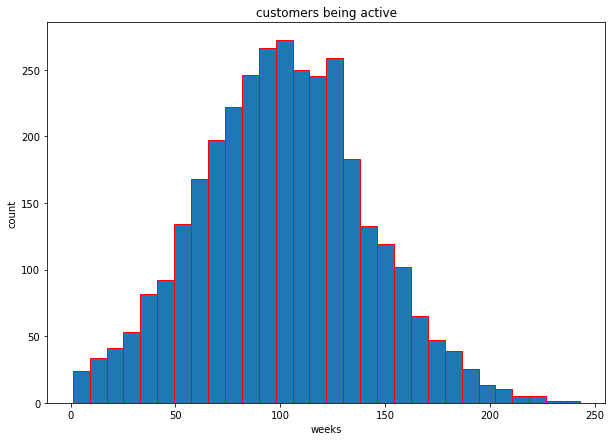

In [24]:
plt.figure(figsize=(10,7))
plt.hist(df['weeks_active'],edgecolor='red',bins=30)
plt.xlabel('weeks')
plt.ylabel('count')
plt.title('customers being active')
plt.show()

In [25]:
# Observation
## The maximum number of weeks that a customer being active is 243 weeks
## The minimum number of weeks that a customer being active is 1 week
## And the more number of weeks that the customers being active is in between 60 and 140 weeks

## Analysis on customers who renewed the contract

In [26]:
r=df.conrenew_flag.value_counts(normalize=True)
r

1    0.90309
0    0.09691
Name: conrenew_flag, dtype: float64

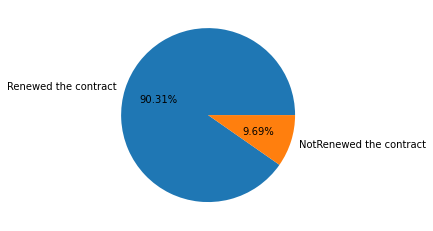

In [27]:
plt.pie(r,labels=['Renewed the contract','NotRenewed the contract'],autopct='%1.2f%%')
plt.show()

In [28]:
df.conrenew_flag.value_counts()

1    3010
0     323
Name: conrenew_flag, dtype: int64

In [29]:
# Observation 
## Nearly 3000 customers have renewed the Contract
## and about 323 customers have not renewed the Contract

## Analysis on Data plan

In [30]:
## 1->> Indicates that the customers has the plan on going 
## 0->> Indicates that the customers has no plan

In [31]:
sns.set_theme()

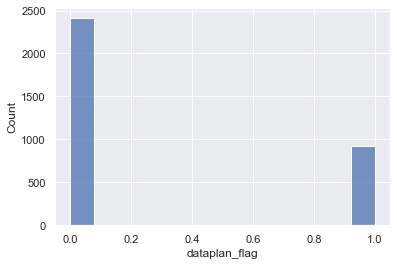

In [32]:
sns.histplot(df.dataplan_flag);

In [33]:
d=df.dataplan_flag.value_counts(normalize=True)
d

0    0.723372
1    0.276628
Name: dataplan_flag, dtype: float64

In [34]:
# Observation 
## About 72 % has no plan
## About 28 % has plan

In [35]:
# Observation 
## About 2411 customers have their Data Plan
## About 922 customers don't have their Data Plan

# Analysis on data_flag

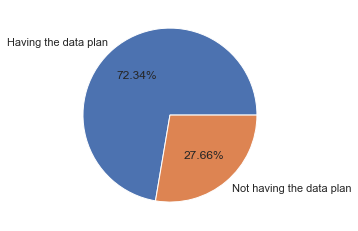

In [36]:
plt.pie(d,labels=['Having the data plan','Not having the data plan'],autopct='%1.2f%%')
plt.show()

# Analysis on calls to customer_service

In [37]:
df.num_cs_calls.value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: num_cs_calls, dtype: int64

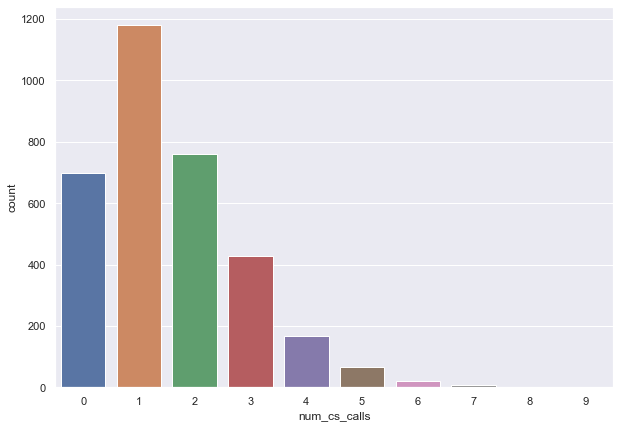

In [38]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='num_cs_calls');

In [39]:
# Observation
## The max number of calls to customer service is found to be 1 i.e, 1181
## followed by 2 calls which is of 759 times and so on

# Analysis on avg_talk_time in a Day

In [40]:
df['avg_talk_time'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: avg_talk_time, dtype: float64

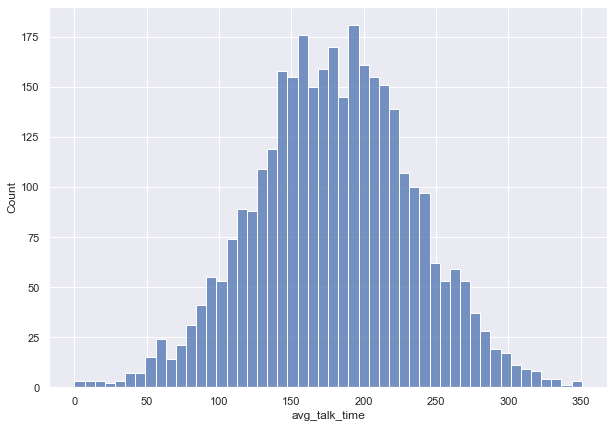

In [41]:
plt.figure(figsize=(10,7))
sns.histplot(df['avg_talk_time'],bins=50);

In [42]:
# Observation
## The maximum average talk time in a day is found out to be 350.8 minutes
## And the more number of average talk time in a day lies between 140 minutes and 230 minutes


# Analysis on average Calls made in day

In [43]:
df.avg_calls.describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: avg_calls, dtype: float64

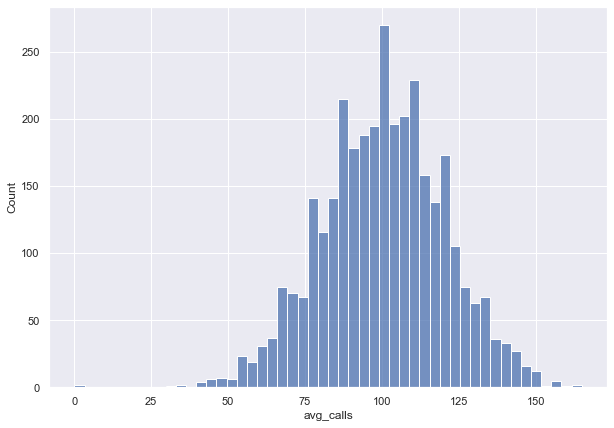

In [44]:
plt.figure(figsize=(10,7))
sns.histplot(df.avg_calls,bins=50);

In [45]:
# Observation 
## The maximum number of calls made in a day is found out to be 165
## The least number of calls made in a day is found out to be 0
## And the maximum number of calls in a day lies between the number 80 and 120

# Analysis on average monthly_bill

In [46]:
df.mth_bill.nunique()

627

In [47]:
df.mth_bill.describe()

count    3333.000000
mean       56.305161
std        16.426032
min        14.000000
25%        45.000000
50%        53.500000
75%        66.200000
max       111.300000
Name: mth_bill, dtype: float64

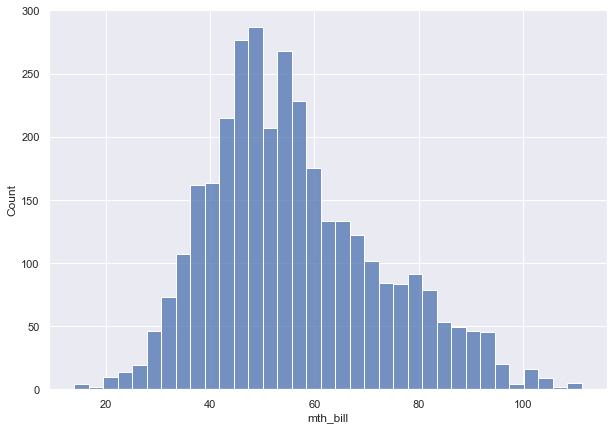

In [48]:
plt.figure(figsize=(10,7))
sns.histplot(df.mth_bill);

In [49]:
# Observation 
## The maximum average of monthly_bill is found out to be 111
## The minimum average of monthly_bill is found out to be 14
## And the most number of monthly_bill is fallen between 40 and 60

# Analysis on overagefee

In [50]:
df.overagefee.nunique()

1024

In [51]:
df.overagefee.describe()

count    3333.000000
mean       10.051488
std         2.535712
min         0.000000
25%         8.330000
50%        10.070000
75%        11.770000
max        18.190000
Name: overagefee, dtype: float64

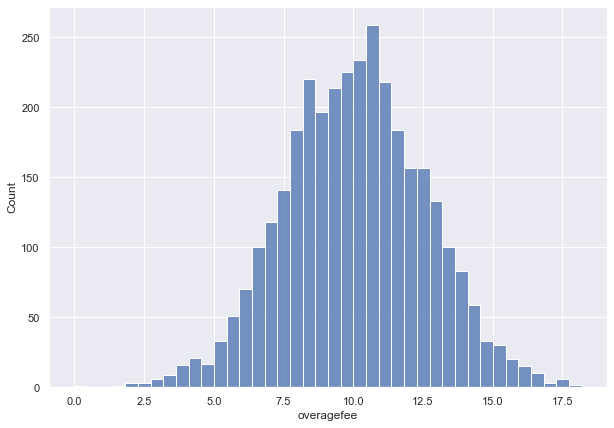

In [52]:
plt.figure(figsize=(10,7))
sns.histplot(df.overagefee);

In [53]:
# Observation
## The largest overagefee in the last 12 months is found 

# Analysis on Roaming_minutes

In [54]:
df.roam_mins.describe()

count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: roam_mins, dtype: float64

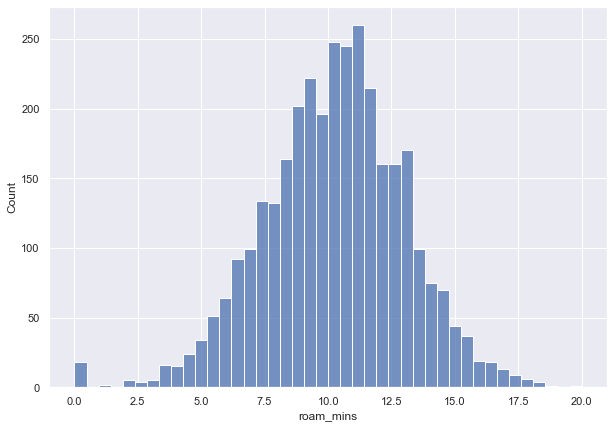

In [55]:
plt.figure(figsize=(10,7))
sns.histplot(df.roam_mins);

In [56]:
# Observation
## The maximum number of roaming minutes is found out to be 20 min
## The minimum number of roaming minutes is found out to be 00 min
## The more number of roaming minutes lies between 7.5 to 13 minutes

# Analysis on Churn

In [57]:
df.churn_flag.value_counts()

0    2850
1     483
Name: churn_flag, dtype: int64

In [58]:
c=df.churn_flag.value_counts(normalize=True)
c

0    0.855086
1    0.144914
Name: churn_flag, dtype: float64

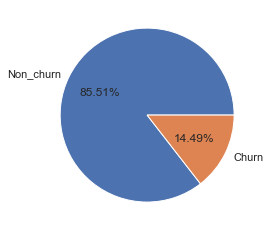

In [59]:
plt.pie(c,labels=['Non_churn','Churn'],autopct='%1.2f%%')
plt.show()

In [60]:
# Observation
## About 14% of the customers are have cancelled the Service
## And about 86% of the customers have not cancelled the Service

<AxesSubplot:xlabel='churn_flag', ylabel='avg_talk_time'>

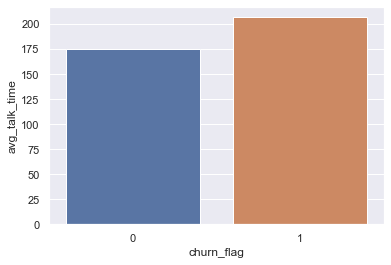

In [61]:
sns.barplot(data=df,x='churn_flag',y='avg_talk_time',ci=None)

# B. Observe Bi-variate distributions


In [62]:
df.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


Text(0, 0.5, 'conrenew_flag')

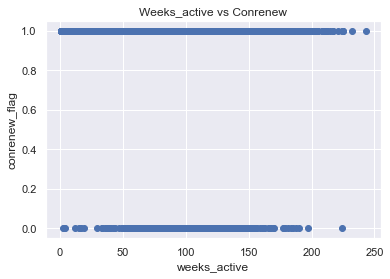

In [63]:
plt.scatter(df['weeks_active'],df['conrenew_flag'])
plt.title('Weeks_active vs Conrenew')
plt.xlabel('weeks_active')
plt.ylabel('conrenew_flag')

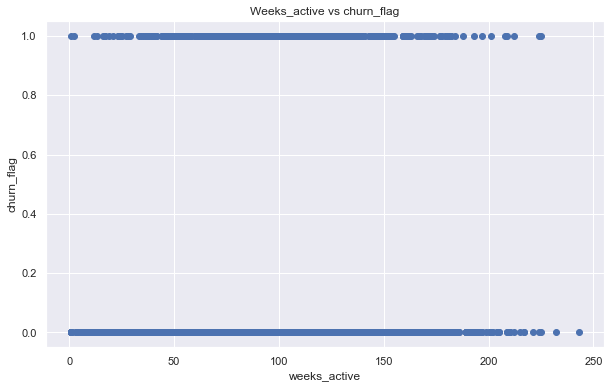

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(df['weeks_active'],df['churn_flag'])
plt.title('Weeks_active vs churn_flag')
plt.xlabel('weeks_active')
plt.ylabel('churn_flag')
plt.show()

# Analysis on 'Weeks_active vs avg_talk_time'

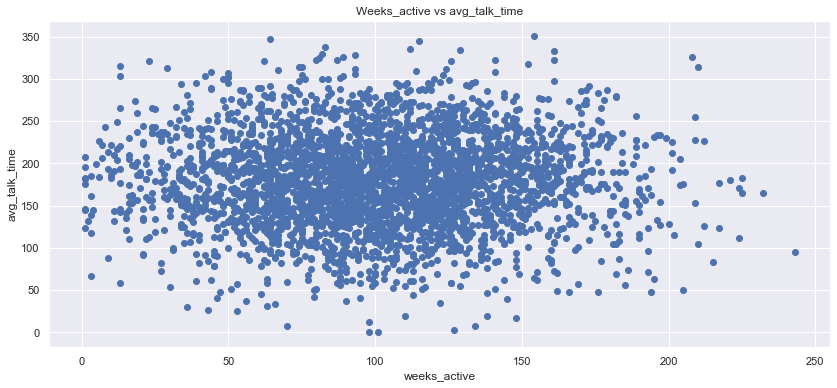

In [65]:
plt.figure(figsize=(14,6))
plt.scatter(df['weeks_active'],df['avg_talk_time'])
plt.title('Weeks_active vs avg_talk_time')
plt.xlabel('weeks_active')
plt.ylabel('avg_talk_time')
plt.show()

In [66]:
# Observation
## The major data points lies in the region 50 to 150 weeks
## As the weeks since the customer being active is increasing the the majority of the customers were found to decresing
## with their avg_talk_time is also decresing

In [67]:
# It indicates that the after 150 weeks the average talk time of the customers is dropping down along with the count of the customers

# Analysis on 'Weeks_active vs data_usage'

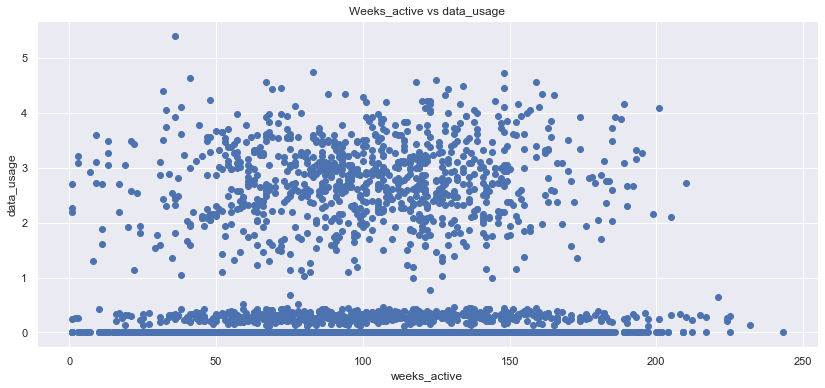

In [68]:
plt.figure(figsize=(14,6))
plt.scatter(df['weeks_active'],df['data_usage'])
plt.title('Weeks_active vs data_usage')
plt.xlabel('weeks_active')
plt.ylabel('data_usage')
plt.show()

In [80]:
df.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='weeks_active', ylabel='avg_calls'>

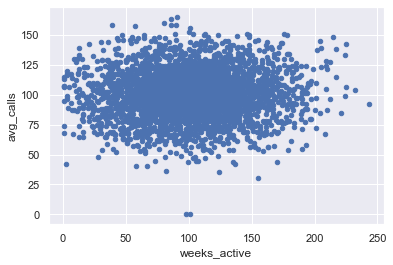

In [82]:
df.plot(kind='scatter',x='weeks_active',y='avg_calls')

# Analysis on 'Weeks_active vs avg_calls'

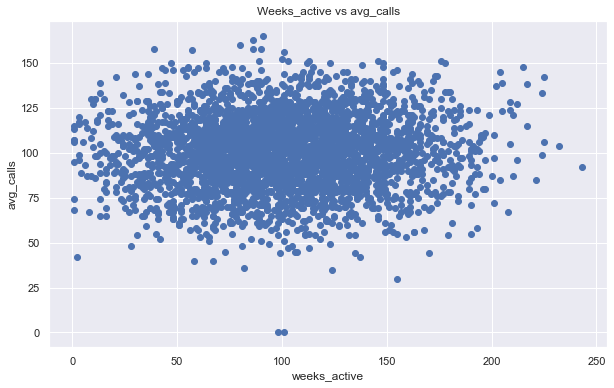

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(df['weeks_active'],df['avg_calls'])
plt.title('Weeks_active vs avg_calls')
plt.xlabel('weeks_active')
plt.ylabel('avg_calls')
plt.show()

In [ ]:
# Observation 
## The major data points lies in the region 50 to 150 weeks
## As the weeks since the customer being active is increasing the the majority of the customers were found to be decresing
## It indicates that the after 150 weeks the average talk time of the customers is dropping down
## along with the count of the customers

# Analysis on 'Weeks_active vs overagefee'

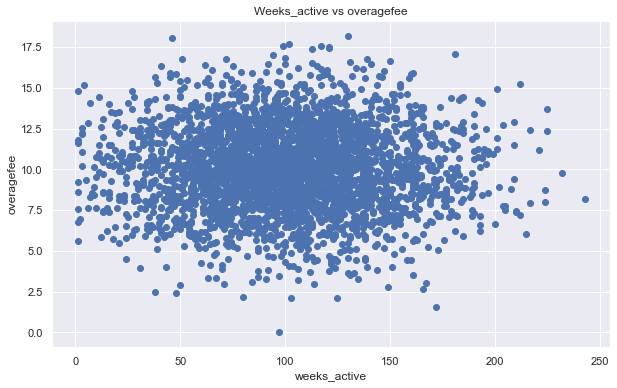

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(df['weeks_active'],df['overagefee'])
plt.title('Weeks_active vs overagefee')
plt.xlabel('weeks_active')
plt.ylabel('overagefee')
plt.show()

In [ ]:
# Observation
## The major data points lies in the region 60 to 140 weeks
## the maximum overagefee is found out to be

In [90]:
df.overagefee.max()

18.19

In [69]:
df[(df.conrenew_flag==1) & (df.data_usage==0) & (df.weeks_active)>200]`

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag


In [70]:
df[df['data_usage']<=1]

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,0
5,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3,0
7,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...
3326,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9,0
3327,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8,0
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0


In [71]:
df['data_usage'].value_counts()

0.00    1813
0.31      41
0.21      39
0.29      36
0.26      34
        ... 
4.13       1
4.59       1
0.68       1
4.29       1
4.64       1
Name: data_usage, Length: 174, dtype: int64

In [72]:
# Observation
## Nearly  2420 customers uses less than 1 Gb even when the weeks_active is increasing
## Most of the data points are concentrated in the region between 50 and 150 weeks
## During this the more number of customers were using between 3 and 4 Gb
## After 150 weeks the customers using the data between 3 and 4 Gb is significantly dropping down 
## After 200 weeks their is more number of customers who have used the data

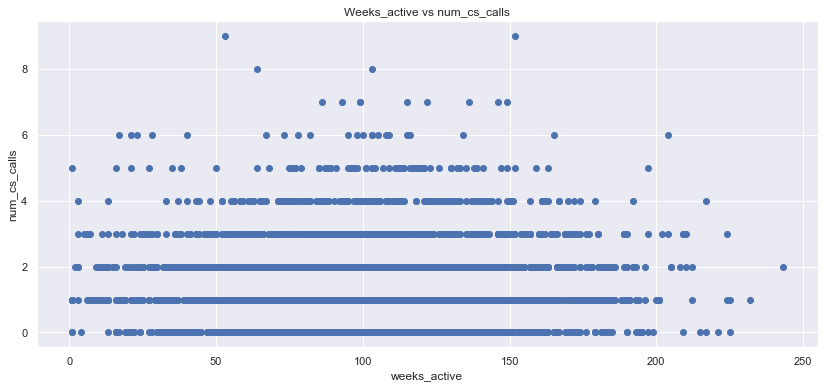

In [73]:
plt.figure(figsize=(14,6))
plt.scatter(df['weeks_active'],df['num_cs_calls'])
plt.title('Weeks_active vs num_cs_calls')
plt.xlabel('weeks_active')
plt.ylabel('num_cs_calls')
plt.show()

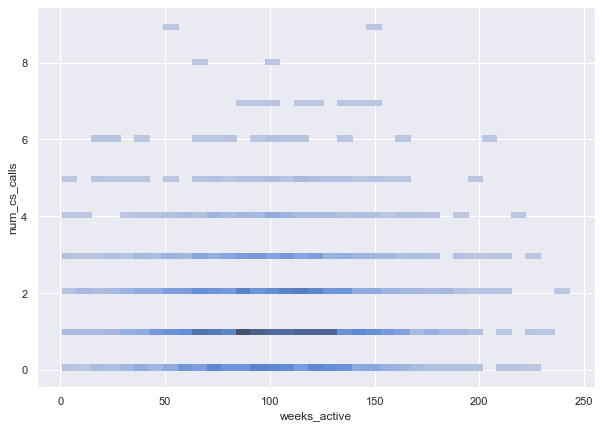

In [74]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='weeks_active',y='num_cs_calls');

In [75]:
df[df.churn_flag==1]

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
10,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7,1
15,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4,1
21,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7,1
33,12,1,0,0.00,1,249.6,118,64.0,12.62,11.8,1
41,135,0,1,3.94,0,173.1,85,86.4,10.20,14.6,1
...,...,...,...,...,...,...,...,...,...,...,...
3301,84,1,0,0.00,0,280.0,113,65.0,10.11,10.4,1
3304,71,0,0,0.00,4,186.1,114,49.0,9.93,13.8,1
3320,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7,1
3322,62,1,0,0.00,4,321.1,105,78.0,13.28,11.5,1


In [76]:
# 3010 have renewed the plan out of 3333

In [77]:
df[df.conrenew_flag==1].count()

weeks_active     3010
conrenew_flag    3010
dataplan_flag    3010
data_usage       3010
num_cs_calls     3010
avg_talk_time    3010
avg_calls        3010
mth_bill         3010
overagefee       3010
roam_mins        3010
churn_flag       3010
dtype: int64

In [78]:
#the below the number of people that are changing and not having the renewal plan
# 137

In [79]:
d=df[(df.conrenew_flag==0) & (df.churn_flag==1)]
d

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
41,135,0,1,3.94,0,173.1,85,86.4,10.20,14.6,1
115,36,0,1,5.40,0,196.8,89,110.0,12.75,20.0,1
144,117,0,0,0.00,2,167.1,86,44.0,8.88,14.1,1
198,131,0,1,3.73,4,292.9,101,104.3,9.99,13.8,1
214,70,0,0,0.00,2,226.7,98,58.0,11.41,17.6,1
...,...,...,...,...,...,...,...,...,...,...,...
3246,77,0,1,3.21,0,103.2,117,70.1,11.82,11.9,1
3255,138,0,0,0.00,2,286.2,61,65.0,9.36,11.0,1
3291,119,0,1,3.75,1,172.1,119,86.5,11.18,13.9,1
3304,71,0,0,0.00,4,186.1,114,49.0,9.93,13.8,1
